### Main.ipynb consist of 
1. Hashing- Hash function - Bloomfilter ( Mohammadreza Mowlai)
2. Alphabetic Sorting- Counting Sort algo | string sorting | Word sorting ( Muhammad Anwar Alam)
3. Clustering and Map Reduce (Niccolò Mascaro)

#### HW_4 Group 8

# 1.Hashing 

In [5]:
import pandas as pd,numpy as np
import math,time

### Data Extraction

In [4]:
# Reading the file
with open('passwords1.txt','r') as f:
    lines = f.readlines()
    f.close()

In [5]:
# Removing the "\n"s
for i in range(len(lines)):
    lines[i] = lines[i].strip().split('\n')[0]

In [6]:
len(lines)

100000000

In [ ]:
# making a data frame
pws = pd.DataFrame(lines)

In [8]:
pws.head()

,0
0,JV#0$S;D@j+c96/8C(W%
1,"J,)e+LH'ENmdV5YGWu4B"
2,tR0V2@$SNuU9;<&DafxO
3,/DXhI;GNl*nbCzKso=?@
4,b*ZB/egd=!XcvV>K(qY@


In [9]:
p = 0.09 # prob. of False possitive
n = 100_000_000 # Number of all passwords1
m = round((-(n*math.log(p))/((math.log(2))**2))) # The length of our Bloom filter
k = round((m/n)*(math.log(2)))    # Number of hash functions needed


## Creating Bloomfilter

In [10]:
# Creating an empty bloomfilter(with 0 as a default value)
hash_table = np.zeros(m, dtype = int)

### Hash Function

In [12]:
# Hash functions
def hash_func1(s):
    hash = 0
    for i in range(len(s)-1,-1,-1):
        hash += ord(s[i]) * pow(10,i)
    return hash % m

def hash_func2(s):
    hash = 0
    for i in range(len(s)-1,-1,-1):
        ascii_code = ord(s[i])
        hash = 128 * hash + ascii_code
    return hash % m

def hash_func3(s):
    hash = 0
    for i in range(len(s)-1,-1,-1):
        hash += ord(s[i]) * pow(5,i)
    return hash % m      
        
        


### Updating Bloom filter with Hash Function

In [13]:
# Here we update the bloom filter by the index we got from hash functions
def hash_table_update():
    for _ in pws[0]:
        res1 = hash_func1(_)
        res2 = hash_func2(_)
        res3 = hash_func3(_)
        
        if hash_table[res1] != 1:
            hash_table[res1] = 1
            
        if hash_table[res2] != 1:
            hash_table[res2] = 1
            
        if hash_table[res3] != 1:
            hash_table[res3] = 1

In [14]:
# Now we need the 2nd dataset to chech the duplicates
with open('passwords2.txt','r') as f2:
    lines2 = f2.readlines()
    f2.close()

In [15]:
for i in range(len(lines2)):
    lines2[i] = lines2[i].strip().split('\n')[0]

In [16]:
pws2 = pd.DataFrame(lines2)

In [17]:
# Here we calculate the number of duplicate passwords we have
def duplicates():
    N = 0
    for _ in pws2[0]:
        res2_1 = hash_func1(_)
        res2_2 = hash_func2(_)
        res2_3 = hash_func3(_)
        if hash_table[res2_1] == 1 and hash_table[res2_2] == 1 and hash_table[res2_3] == 1:
            N += 1
    return N

### Final BloomFilter

In [18]:
def BloomFilter():
    start = time.time()
    
    hash_table_update()
    n = duplicates()
    
    
    end = time.time()
    
    print('Number of hash function used: ', k)
    print('Number of duplicates detected: ', n)
    print('Probability of false positives: ', p)
    print('Execution time: ', end-start)
    

## BloomFilter Test

In [19]:
BloomFilter()

Number of hash function used:  3
Number of duplicates detected:  16288397
Probability of false positives:  0.09
Execution time:  3460.731966972351


# 2.Alphabetic Sorting

### A. Counting Sort Algo

### Creating a Auxilary Dataframe

In [6]:

    Aindex = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
    Acolumns = ['Value']
    Adf = pd.DataFrame(index = Aindex, columns = Acolumns).fillna(0)
    Adf

,Value
a,0
b,0
c,0
d,0
e,0
f,0
g,0
h,0
i,0
j,0


In [11]:
Istr = "zzzkkkaaa"

### Creating frequency Table of array on Auxilary Data frame

In [13]:

for i in Istr:       # Substituing the count of alphabets (index) in the Value Column
    Adf.at[i,'Value']+=1    # adding up the count of alphabets from INPUT String in the Dataframe
Adf

,Value
a,6
b,0
c,0
d,0
e,0
f,0
g,0
h,0
i,0
j,0


### sorted Dataframe

In [15]:

filtnonzero = Adf.Value > 0
Afdf = Adf[filtnonzero]  # Dataframe for INPUT STRINGs only
Afdf


,Value
a,6
k,6
z,6


## Result

In [19]:
Ostr = [] #output
for l in range (len(Afdf)): # length will be the index of Sorted dataframe
    z = Afdf.iloc[l][0]
    for m in range (z):
        Ostr.append(Afdf.index[l])
out = ("".join(Ostr))
out

'aaaaaakkkkkkzzzzzz'

### Function for Algo of implementing Alphabetical order Via Counting Sort

In [21]:
def countingsort (Istr):
    # Creating a Auxilary Dataframe
    index = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
    columns = ['Value']
    df = pd.DataFrame(index = index, columns = columns).fillna(0)

    # Array
    # String entered for Input
    Istr = Istr.lower()   # Making it on a  lower case

    # Creating frequency Table of array on Auxilary Dat frame

    for i in Istr:       # Substituing the count of alphabets (index) in the Value Column
        df.at[i, 'Value']+=1    # adding up the count of alphabets from INPUT String in the Dataframe

    # sorted Dataframe
    filtnonzero = df.Value > 0
    fdf = df[filtnonzero]  # Dataframe for INPUT STRINGs only

    # Result

    Ostr = []
    for l in range (len(fdf)): # length will be the index of Sorted dataframe
        z = fdf.iloc[l][0]
        for m in range (z):
            Ostr.append(fdf.index[l])

    ## Output
    out = ("".join(Ostr))
    return(out)


## B. String Sorting

In [22]:
## 2. Alphabetic String Sorting

strinput = input("Enter a string of alphabets :")
d = countingsort(strinput)
print ("Sorted string is: ",d)


Enter a string of alphabets :zzzkkkpppaaa
Sorted string is:  aaakkkpppzzz


# C. Words Sorting

In [34]:
import numpy as np
import pandas as pd

## Summarize Result

In [149]:
Inpstr = []
Inpstr = input(" Enter the string (non nemeric words) :").lower().split()
print ("Sorted word in this string are :",alphabetical_sort(Inpstr))

 Enter the string (non nemeric words) :one of the best teacher is Aris
Sorted word in this string are : ['aris', 'best', 'is', 'of', 'one', 'teacher', 'the']


### Construction and Steps of sort including the Application of Counting Algorithm is Below

## Input

In [92]:
Inpstr = []
Inpstr = input(" Enter the string :").lower().split()
#Inpstr = ['anwar','canvar','banvar','gan']# input string of Words
n = len(max(Inpstr, key=len))# maximum length of the word in a string
print(n)
m = len(Inpstr)
print(m)
Inpstr

 Enter the string :one of the best teacher is Aris
7
7


['one', 'of', 'the', 'best', 'teacher', 'is', 'aris']

## Creating DataSet for the Input

In [93]:
df = np.zeros((m,n+1), dtype=int) # dataset in addition of a column for index
df[:,0] = range(m) # inserint Index of Words
df
    

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0, 0, 0],
       [6, 0, 0, 0, 0, 0, 0, 0]])

## Inserting the Ordinals of alphabets of each word

In [94]:
for s in range (0,m): # inserting Words in the dataset
    t = len(Inpstr[s])
    for l in range (0,t):
        df[s][l+1] = (ord(str((Inpstr[s])[l])))
df

array([[  0, 111, 110, 101,   0,   0,   0,   0],
       [  1, 111, 102,   0,   0,   0,   0,   0],
       [  2, 116, 104, 101,   0,   0,   0,   0],
       [  3,  98, 101, 115, 116,   0,   0,   0],
       [  4, 116, 101,  97,  99, 104, 101, 114],
       [  5, 105, 115,   0,   0,   0,   0,   0],
       [  6,  97, 114, 105, 115,   0,   0,   0]])

## Now the COUNTING SORT

#### Assuming an ARRAY

In [99]:
arr = [111,111,116,98,116,105,97]

#### Creating Auxillary Dataframe for frequency and Commulative frequency

In [100]:
AUXarrindex = ['Frequency', 'Commulative']
Auxarrcolumns = [i for i in range (97,123)]
Auxarrdf = (pd.DataFrame(index = AUXarrindex, columns = Auxarrcolumns)).fillna(0)
Auxarrdf

,97,98,99,100,101,102,103,104,105,106,...,113,114,115,116,117,118,119,120,121,122
Frequency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Commulative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Inserting Frequency

In [101]:
for i in arr:
    Auxarrdf.at['Frequency', i]+=1# inserting Commulative Frequency
Auxarrdf

,97,98,99,100,101,102,103,104,105,106,...,113,114,115,116,117,118,119,120,121,122
Frequency,1,1,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
Commulative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Inserting Commulative Frequency

In [102]:
Auxarrdf.loc['Commulative'] = Auxarrdf.loc['Frequency'].values.cumsum()
Auxarrdf

,97,98,99,100,101,102,103,104,105,106,...,113,114,115,116,117,118,119,120,121,122
Frequency,1,1,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
Commulative,1,2,2,2,2,2,2,2,3,3,...,5,5,5,7,7,7,7,7,7,7


#### creating a Sorted Dataframe-- pertaining the Sorting and order of Input array

In [103]:
sorteddfind = ["Sorted", "order"]
sorteddfcol = [c for c in range (0,len(arr))]
Sorted_df = (pd.DataFrame(index = sorteddfind , columns = sorteddfcol)).fillna(0)
Sorted_df

,0,1,2,3,4,5,6
Sorted,0,0,0,0,0,0,0
order,0,0,0,0,0,0,0


#### Inserting sorting from Auxillary Dataframe [Commulative Frequency]

In [104]:

for i,a in enumerate (arr):
    (Sorted_df.iloc[0][(Auxarrdf.iloc[1][a])-1]) = a #order
    (Sorted_df.iloc[1][(Auxarrdf.iloc[1][a])-1]) = i #value
    Auxarrdf.iloc[1][a] = (Auxarrdf.iloc[1][a])-1
Sorted_df

,0,1,2,3,4,5,6
Sorted,97,98,105,111,111,116,116
order,6,3,5,1,0,4,2


In [105]:
list(Sorted_df.loc['order'].values)

[6, 3, 5, 1, 0, 4, 2]

In [106]:
(Sorted_df.loc['Sorted'].values)

array([ 97,  98, 105, 111, 111, 116, 116], dtype=int64)

### Making Counting Sort a Function

In [107]:
def c_sort(arr): #counting Sort
    
    # Creating Auxillary Dataframe for frequency and Commulative frequency
    
    AUXarrindex = ['Frequency', 'Commulative'] #
    Auxarrcolumns = [i for i in range (97,123)]
    Auxarrdf = (pd.DataFrame(index = AUXarrindex, columns = Auxarrcolumns)).fillna(0)
    
    # inserting Commulative Frequency

    for i in arr:   
        Auxarrdf.at['Frequency', i]+=1 
        
    # inserting Commulative Frequency
    
    Auxarrdf.loc['Commulative'] = Auxarrdf.loc['Frequency'].values.cumsum()
    
    # creating a Sorted Dataframe-- pertaining the Sorting and order of Input array
    
    sorteddfind = ["Sorted", "order"]
    sorteddfcol = [c for c in range (0,len(arr))]
    Sorted_df = (pd.DataFrame(index = sorteddfind , columns = sorteddfcol)).fillna(0)
    
    # Inserting sorting from Auxillary Dataframe [Commulative Frequency]
    
    for i,a in enumerate (arr):    
        (Sorted_df.iloc[0][(Auxarrdf.iloc[1][a])-1]) = a
        (Sorted_df.iloc[1][(Auxarrdf.iloc[1][a])-1]) = i
        Auxarrdf.iloc[1][a] = (Auxarrdf.iloc[1][a])-1
        
    # returning the output
    
    return list(Sorted_df.loc['Sorted'].values), list(Sorted_df.loc['order'].values)

#### Testing Sorting Function

In [108]:
c_sort([111,111,116,98,116,105,97])# sort function checking

([97, 98, 105, 111, 111, 116, 116], [6, 3, 5, 1, 0, 4, 2])

##  Sorting every column one by one, keeping in view the previous is same

In [109]:
pre_problems = list([list(range(m))])

In [120]:
# dividing problem into Sub problems
for i in range(1,n):
    problems = list() #considering the column
    for curr_problem in pre_problems:
        sorted_arrays, sorted_order = c_sort(df[curr_problem,i])
        df[curr_problem,:] = df[curr_problem,:][sorted_order,:]
        target_ind = list(range(len(sorted_arrays)))
        problems_list = list()
        new_problem = [curr_problem[0]]
        
        for j in range(1,len(sorted_arrays)):
            if sorted_arrays[j] == sorted_arrays[j-1]:
                new_problem.append(target_ind[j])
            else:
                if len(new_problem) > 1:
                    problems_list.append(new_problem)
                new_problem = [target_ind[j]]
        if len(new_problem) > 1:
            problems_list.append(new_problem)
        problems = problems + problems_list
        pre_problems = problems
[Inpstr[i] for i in list(df[:,0])]
        

['aris', 'best', 'is', 'of', 'one', 'teacher', 'the']

## Making a function of Alphabetical Sort

In [142]:
def alphabetical_sort(Inpstr):
    n = len(max(Inpstr, key=len))# maximum length of the word in a string
    #print(n)
    m = len(Inpstr)
    #print(m)
    df = np.zeros((m,n+1), dtype=int) # dataset in addition of a column for index
    df[:,0] = range(m) # inserint Index of Words
    #print(df)

    for s in range (0,m): # inserting Words in the dataset
        t = len(Inpstr[s])
        for l in range (0,t):
            df[s][l+1] = (ord(str((Inpstr[s])[l])))
    #print(df)
   
    pre_problems = list([list(range(m))]) #Max times of problem
    #print(pre_problems)
    # dividing problem into Sub problems
    
    for i in range(1,n):
        problems = list() #considering the column
        #print (problems)
        for curr_problem in pre_problems:
            #print (curr_problem)
            sorted_arrays, sorted_order = c_sort(df[curr_problem,i])
            df[curr_problem,:] = df[curr_problem,:][sorted_order,:]
            target_ind = list(range(len(sorted_arrays)))
            problems_list = list()
            new_problem = [curr_problem[0]]
            for j in range(1,len(sorted_arrays)):
                if sorted_arrays[j] == sorted_arrays[j-1]:
                    new_problem.append(target_ind[j])
                else:
                    if len(new_problem) > 1:
                        problems_list.append(new_problem)
                    new_problem = [target_ind[j]]
            if len(new_problem) > 1:
                problems_list.append(new_problem)
            problems = problems + problems_list
        pre_problems = problems
    return [Inpstr[i] for i in list(df[:,0])]

## Final Code for Word sorting

In [ ]:
import numpy as np
import pandas as pd

## Summarize Result

Inpstr = []
Inpstr = input(" Enter the string (non nemeric words) :").lower().split()
print ("Sorted word in this string are :",alphabetical_sort(Inpstr))

### Construction and Steps of sort including the Application of Counting Algorithm is Below

## Input

Inpstr = []
Inpstr = input(" Enter the string :").lower().split()
#Inpstr = ['anwar','canvar','banvar','gan']# input string of Words
n = len(max(Inpstr, key=len))# maximum length of the word in a string
print(n)
m = len(Inpstr)
print(m)
Inpstr

## Creating DataSet for the Input

df = np.zeros((m,n+1), dtype=int) # dataset in addition of a column for index
df[:,0] = range(m) # inserint Index of Words
df
    

## Inserting the Ordinals of alphabets of each word

for s in range (0,m): # inserting Words in the dataset
    t = len(Inpstr[s])
    for l in range (0,t):
        df[s][l+1] = (ord(str((Inpstr[s])[l])))
df

## Now the COUNTING SORT

#### Assuming an ARRAY

arr = [111,111,116,98,116,105,97]

#### Creating Auxillary Dataframe for frequency and Commulative frequency

AUXarrindex = ['Frequency', 'Commulative']
Auxarrcolumns = [i for i in range (97,123)]
Auxarrdf = (pd.DataFrame(index = AUXarrindex, columns = Auxarrcolumns)).fillna(0)
Auxarrdf

#### Inserting Frequency

for i in arr:
    Auxarrdf.at['Frequency', i]+=1# inserting Commulative Frequency
Auxarrdf

#### Inserting Commulative Frequency

Auxarrdf.loc['Commulative'] = Auxarrdf.loc['Frequency'].values.cumsum()
Auxarrdf

#### creating a Sorted Dataframe-- pertaining the Sorting and order of Input array

sorteddfind = ["Sorted", "order"]
sorteddfcol = [c for c in range (0,len(arr))]
Sorted_df = (pd.DataFrame(index = sorteddfind , columns = sorteddfcol)).fillna(0)
Sorted_df

#### Inserting sorting from Auxillary Dataframe [Commulative Frequency]


for i,a in enumerate (arr):
    (Sorted_df.iloc[0][(Auxarrdf.iloc[1][a])-1]) = a #order
    (Sorted_df.iloc[1][(Auxarrdf.iloc[1][a])-1]) = i #value
    Auxarrdf.iloc[1][a] = (Auxarrdf.iloc[1][a])-1
Sorted_df

list(Sorted_df.loc['order'].values)

(Sorted_df.loc['Sorted'].values)

### Making Counting Sort a Function

def c_sort(arr): #counting Sort
    
    # Creating Auxillary Dataframe for frequency and Commulative frequency
    
    AUXarrindex = ['Frequency', 'Commulative'] #
    Auxarrcolumns = [i for i in range (97,123)]
    Auxarrdf = (pd.DataFrame(index = AUXarrindex, columns = Auxarrcolumns)).fillna(0)
    
    # inserting Commulative Frequency

    for i in arr:   
        Auxarrdf.at['Frequency', i]+=1 
        
    # inserting Commulative Frequency
    
    Auxarrdf.loc['Commulative'] = Auxarrdf.loc['Frequency'].values.cumsum()
    
    # creating a Sorted Dataframe-- pertaining the Sorting and order of Input array
    
    sorteddfind = ["Sorted", "order"]
    sorteddfcol = [c for c in range (0,len(arr))]
    Sorted_df = (pd.DataFrame(index = sorteddfind , columns = sorteddfcol)).fillna(0)
    
    # Inserting sorting from Auxillary Dataframe [Commulative Frequency]
    
    for i,a in enumerate (arr):    
        (Sorted_df.iloc[0][(Auxarrdf.iloc[1][a])-1]) = a
        (Sorted_df.iloc[1][(Auxarrdf.iloc[1][a])-1]) = i
        Auxarrdf.iloc[1][a] = (Auxarrdf.iloc[1][a])-1
        
    # returning the output
    
    return list(Sorted_df.loc['Sorted'].values), list(Sorted_df.loc['order'].values)

#### Testing Sorting Function

c_sort([111,111,116,98,116,105,97])# sort function checking

##  Sorting every column one by one, keeping in view the previous is same

pre_problems = list([list(range(m))])

# dividing problem into Sub problems
for i in range(1,n):
    problems = list() #considering the column
    for curr_problem in pre_problems:
        sorted_arrays, sorted_order = c_sort(df[curr_problem,i])
        df[curr_problem,:] = df[curr_problem,:][sorted_order,:]
        target_ind = list(range(len(sorted_arrays)))
        problems_list = list()
        new_problem = [curr_problem[0]]
        
        for j in range(1,len(sorted_arrays)):
            if sorted_arrays[j] == sorted_arrays[j-1]:
                new_problem.append(target_ind[j])
            else:
                if len(new_problem) > 1:
                    problems_list.append(new_problem)
                new_problem = [target_ind[j]]
        if len(new_problem) > 1:
            problems_list.append(new_problem)
        problems = problems + problems_list
        pre_problems = problems
[Inpstr[i] for i in list(df[:,0])]
        

## Making a function of Alphabetical Sort

def alphabetical_sort(Inpstr):
    n = len(max(Inpstr, key=len))# maximum length of the word in a string
    #print(n)
    m = len(Inpstr)
    #print(m)
    df = np.zeros((m,n+1), dtype=int) # dataset in addition of a column for index
    df[:,0] = range(m) # inserint Index of Words
    #print(df)

    for s in range (0,m): # inserting Words in the dataset
        t = len(Inpstr[s])
        for l in range (0,t):
            df[s][l+1] = (ord(str((Inpstr[s])[l])))
    #print(df)
   
    pre_problems = list([list(range(m))]) #Max times of problem
    #print(pre_problems)
    # dividing problem into Sub problems
    
    for i in range(1,n):
        problems = list() #considering the column
        #print (problems)
        for curr_problem in pre_problems:
            #print (curr_problem)
            sorted_arrays, sorted_order = c_sort(df[curr_problem,i])
            df[curr_problem,:] = df[curr_problem,:][sorted_order,:]
            target_ind = list(range(len(sorted_arrays)))
            problems_list = list()
            new_problem = [curr_problem[0]]
            for j in range(1,len(sorted_arrays)):
                if sorted_arrays[j] == sorted_arrays[j-1]:
                    new_problem.append(target_ind[j])
                else:
                    if len(new_problem) > 1:
                        problems_list.append(new_problem)
                    new_problem = [target_ind[j]]
            if len(new_problem) > 1:
                problems_list.append(new_problem)
            problems = problems + problems_list
        pre_problems = problems
    return [Inpstr[i] for i in list(df[:,0])]

## 3. Find Similar Wines!

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline

## K means clustering

K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 

When processing the training data, the K-means algorithm begins with an initial set of randomnly chosen centroids, which serve as starting points for each cluster, and applies Lloyd's algorithm to iteratively refine the locations of the centroids. The K-means algorithm stops building and refining clusters when it meets one or more of these conditions:

$\bullet$ The centroids stabilize, meaning that cluster assignments for individual points no longer change and the algorithm has converged on a solution.

$\bullet$ The algorithm completed running the specified number of iterations.


In [2]:
def kmeans(data):
    
    data = data.sample(frac=1).reset_index(drop=True)
    

    data['cluster'] = None
    data.iloc[0,-1]=1
    data.iloc[1,-1]=2
    data.iloc[2,-1]=3

    mean_cluster1 = list(data[data['cluster']==1].iloc[:,1:-1].mean(axis=0))
    mean_cluster2 = list(data[data['cluster']==2].iloc[:,1:-1].mean(axis=0))
    mean_cluster3 = list(data[data['cluster']==3].iloc[:,1:-1].mean(axis=0))

    distance_metric1=1000
    distance_metric2=0
    iter_count = 1
    abs_diff=1000
    
    while abs_diff>0.001:
        distance_metric2=distance_metric1
        distance_metric1=0
        for i in range(data.shape[0]):
            this_point = list(data.iloc[i,1:-1])
            euc_dist_clust1 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster1)]))
            euc_dist_clust2 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster2)]))
            euc_dist_clust3 = math.sqrt(sum([(a - b) ** 2 for a, b in zip(this_point, mean_cluster3)]))
            min_dist = min(euc_dist_clust1, euc_dist_clust2, euc_dist_clust3)
            if min_dist == euc_dist_clust1:
                x = 1
            elif min_dist == euc_dist_clust2:
                x = 2
            else:
                x = 3
            if data.iloc[i,-1] != x:
               
                data.iloc[i,-1] = x
            mean_cluster1 = list(data[data['cluster']==1].iloc[:,1:-1].mean(axis=0))
            mean_cluster2 = list(data[data['cluster']==2].iloc[:,1:-1].mean(axis=0))
            mean_cluster3 = list(data[data['cluster']==3].iloc[:,1:-1].mean(axis=0))
            distance_metric1 = distance_metric1+min_dist
        
        abs_diff = abs(distance_metric1-distance_metric2)
        iter_count += 1
        if (abs_diff==0):
            break
    return(data)

### Import the data

In [3]:
data=pd.read_csv('wine.data',header=None)
data.columns=['class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
#data= data.drop('class', 1)
#data= data.drop(columns=[0])
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Retrieving two specific columns.

In [4]:
X = data[['Alcohol','Color_intensity']]

In [5]:
df=kmeans(X)

In [6]:
# Creating the dataset with each object allocated to a cluster
df.head()

,Alcohol,Color_intensity,cluster
0,14.02,4.700000,1
1,13.41,4.280000,1
2,12.77,9.899999,3
3,12.77,3.400000,2
4,12.99,3.350000,2


### Calculating centroids

In [7]:
# Calculating the sum of the attributes
df_sum=df.groupby(["cluster"]).sum()
df_sum

,Alcohol,Color_intensity
cluster,,
1,903.86,216.940000
2,994.84,404.210000
3,415.41,279.189999


In [8]:
# Counting the number of members in the clusters
df_count=df.groupby(["cluster"]).count()
df_count

,Alcohol,Color_intensity
cluster,,
1,73,73
2,74,74
3,31,31


In [9]:
# Clculating the values of the centroids
centroids=df_sum.iloc[0:3]/df_count.iloc[0:3,0:2]

In [10]:
centroids

,Alcohol,Color_intensity
cluster,,
1,12.381644,2.971781
2,13.443784,5.462297
3,13.400323,9.006129


In [11]:
colors = ["red","green","blue","black"]

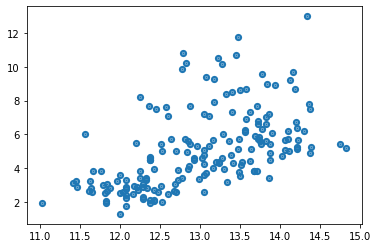

In [12]:
plt.scatter(df['Alcohol'],df["Color_intensity"],marker='.', s=20, linewidths=5)
    

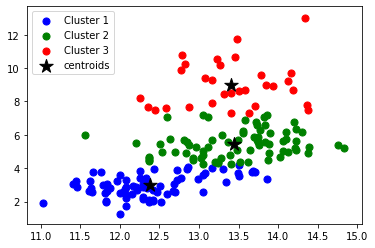

In [13]:
df['subset'] = np.select([df.cluster==1, df.cluster==2, df.cluster==3],
                         ['Cluster 1', 'Cluster 2', 'Cluster 3'])
for color, label in zip('bgrm', ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    subset = df[df.subset == label]
    plt.scatter(subset.Alcohol, subset.Color_intensity, s=50, c=color, label=str(label))
plt.scatter(centroids["Alcohol"],centroids["Color_intensity"],c="black",s=200,linewidth=1,marker="*", label="centroids")
plt.legend()

#### Retrieving three specific columns.

In [14]:
#data= data.drop('class', axis=1)

In [14]:
Y = data[['Alcohol','Magnesium','Flavanoids']]

In [15]:
df=kmeans(Y)

In [16]:
# Creating the dataset with each object allocated to a cluster
df.head()

,Alcohol,Magnesium,Flavanoids,cluster
0,13.84,89,0.83,1
1,14.30,120,3.14,2
2,13.28,110,2.68,3
3,13.71,95,0.61,1
4,13.75,89,2.76,1


#### Calculating centroids

In [17]:
# Calculating the sum of the attributes
df_sum=df.groupby(["cluster"]).sum()
df_sum

,Alcohol,Magnesium,Flavanoids
cluster,,,
1,941.07,6462,134.15
2,346.52,3253,64.05
3,1026.52,8039,163.01


In [18]:
# Counting the number of members in the clusters
df_count=df.groupby(["cluster"]).count()
df_count

,Alcohol,Magnesium,Flavanoids
cluster,,,
1,74,74,74
2,26,26,26
3,78,78,78


In [19]:
# Clculating the values of the centroids
centroids=df_sum.iloc[0:3]/df_count.iloc[0:3,0:3]

In [20]:
centroids

,Alcohol,Magnesium,Flavanoids
cluster,,,
1,12.717162,87.324324,1.812838
2,13.327692,125.115385,2.463462
3,13.160513,103.064103,2.089872


In [21]:
colors = ["red","green","blue","black"]

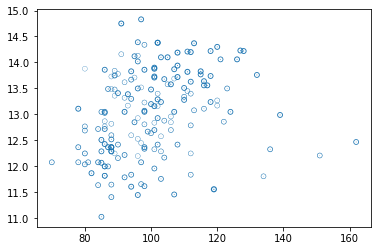

In [22]:
plt.scatter(df['Magnesium'],df["Alcohol"],df['Flavanoids'],marker='.', linewidths=5)

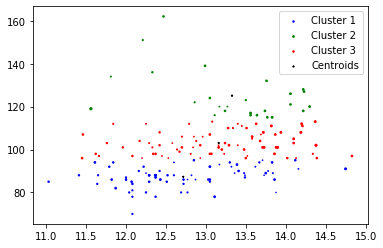

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

df['subset'] = np.select([df.cluster==1, df.cluster==2, df.cluster==3],
                         ['Cluster 1', 'Cluster 2', 'Cluster 3'])

fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4


for color, label in zip('bgrm', ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    subset = df[df.subset == label]
    plt.scatter(subset.Alcohol,subset.Magnesium,subset.Flavanoids,c=color, label=str(label))
plt.scatter(centroids["Alcohol"],centroids["Magnesium"],centroids["Flavanoids"],marker='*',c="black",label="Centroids")
plt.legend()

#### Plotting in 3D plot

/home/mohammadreza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

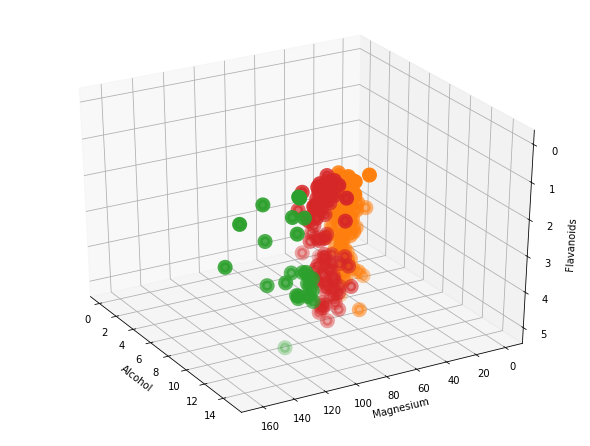

In [24]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=210)
for i in range(0,4):
    ax.scatter3D(df[df.cluster == i]['Alcohol'],
                df[df.cluster == i]['Magnesium'],
                df[df.cluster == i]['Flavanoids'], s=100, linewidth=5)
ax.set_xlabel("Alcohol")
ax.set_ylabel("Magnesium")
ax.set_zlabel("Flavanoids")
fig.show()